# Logistic Regression From First Principles

> Các biến giống với hồi quy tuyến tính, khác ở chỗ là sau khi tính z (biến mục tiêu) xog thì có hàm sigmoidchuyển đổi thành một giá trị xác suất nằm trong khoảng từ 0 đến 1

## Lý thuyết

### Hàm Sigmoid

- Trong học máy, hàm sigmoid được dùng để ánh xạ các dự đoán thành xác suất. Hàm sigmoid có dạng đường cong hình chữ S và còn được gọi là đường cong sigmoid.

Hàm sigmoid là một trường hợp đặc biệt của hàm logistic và được biểu diễn bằng công thức toán học và có thể được biểu diễn bằng đồ thị sau



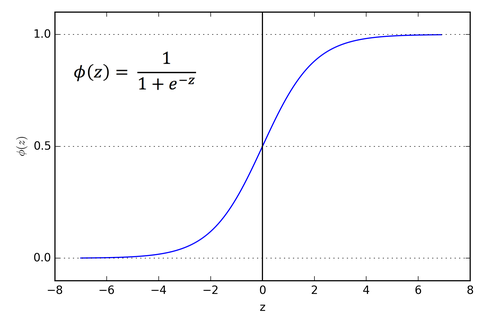

### Đường ranh giới quyết định (Decision boundary)

Hàm sigmoid trả về một giá trị xác suất trong khoảng từ 0 đến 1. Giá trị xác suất này sau đó được ánh xạ thành một lớp rời rạc, hoặc là “0” hoặc là “1”.
Để ánh xạ xác suất thành một lớp rời rạc (đậu/trượt, có/không, đúng/sai), ta chọn một giá trị ngưỡng. Giá trị ngưỡng này được gọi là đường ranh giới quyết định.

- Nếu xác suất lớn hơn hoặc bằng ngưỡng, ta gán vào lớp 1

- Nếu nhỏ hơn ngưỡng, ta gán vào lớp 0

VD: Thông thường, ngưỡng quyết định được đặt là 0.5

p>0.5⇒class=1

p<0.5⇒class=0


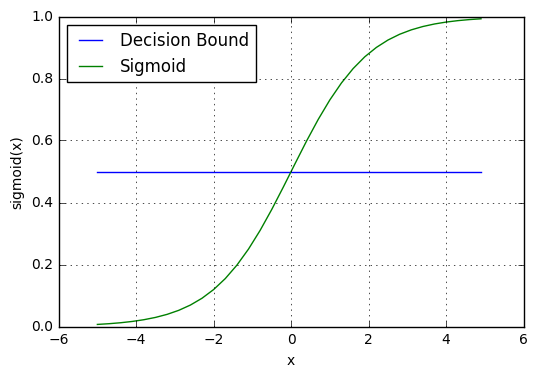

### Các giả định của Logistic Regression

1. Biến phụ thuộc phải là dạng nhị phân, đa lớp hoặc thứ bậc

2. Các quan sát phải độc lập với nhau, không phải là các phép đo lặp lại

3. Các biến độc lập không được có đa cộng tuyến mạnh (không tương quan quá cao với nhau)

4. Mô hình giả định mối quan hệ tuyến tính giữa các biến độc lập và log-odds

5. Hiệu quả của Logistic Regression phụ thuộc vào kích thước mẫu; thông thường cần mẫu lớn để đạt độ chính xác cao

### Các loại Logistic Regression

1. Binary Logistic Regression

Biến mục tiêu có hai giá trị.
Ví dụ: có/không, tốt/xấu, đúng/sai, spam/không spam, đậu/trượt.

2. Multinomial Logistic Regression

Biến mục tiêu có từ ba lớp trở lên và không có thứ tự.
Ví dụ: loại trái cây - táo, xoài, cam, chuối.

3. Ordinal Logistic Regression

Biến mục tiêu có từ ba lớp trở lên và có thứ tự.
Ví dụ: đánh giá học sinh - kém, trung bình, khá, giỏi.

`Tóm lại: tính điểm tuyển tính như hồi quy tuyến tính ra z (biến mục tiêu) sau đó ép z về khoảng [0,1], tiếp theo so với ngưỡng thường là 0.5 nếu >0.5 là class 1 <0.5 là class 0`

---

## Thực hành

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv('weatherAUS.csv')

### EDA

In [6]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [7]:
df.shape

(145460, 23)

In [8]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

#### Phân loại cột phân loại và số

In [10]:
categorical = []
for column in df.columns:
    if df[column].dtype == 'O':
        categorical.append(column)

print('There are', len(categorical), 'categorical variables')
print('The categorical variables are:', categorical)

There are 7 categorical variables
The categorical variables are: ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


In [11]:
df[categorical].head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


> 1 cột ngày 6 cột phân loại trong đó có 2 cột phân loại dạng nhị phân

#### Cột phân loại

In [12]:
df[categorical].isnull().sum()

,0
Date,0
Location,0
WindGustDir,10326
WindDir9am,10566
WindDir3pm,4228
RainToday,3261
RainTomorrow,3267


 > `WindGustDir`, `WindDir9am`, `WindDir3pm`, `RainToday` có dữ liệu thiếu, sẽ xử lý lần lượt bắt đầu từ cột `Date`

##### Tần suất của dữ liệu

In [13]:
# for var in categorical:
#     print(df[var].value_counts()/float(len(df)))

In [14]:
for var in categorical:
    print(var, 'contains', len(df[var].unique()), 'labels')

Date contains 3436 labels
Location contains 49 labels
WindGustDir contains 17 labels
WindDir9am contains 17 labels
WindDir3pm contains 17 labels
RainToday contains 3 labels
RainTomorrow contains 3 labels


##### Cột `Date`

In [15]:
df['Date'].dtypes

dtype('O')

In [16]:
df['Date'] = pd.to_datetime(df['Date'])

In [17]:
df['Year'] = df['Date'].dt.year
df['Year'].head()

,Year
0,2008
1,2008
2,2008
3,2008
4,2008


In [18]:
df['Month'] = df['Date'].dt.month
df['Month'].head()

,Month
0,12
1,12
2,12
3,12
4,12


In [19]:
df['Day'] = df['Date'].dt.day
df['Day'].head()

,Day
0,1
1,2
2,3
3,4
4,5


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 26 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   Evaporation    82670 non-null   float64       
 6   Sunshine       75625 non-null   float64       
 7   WindGustDir    135134 non-null  object        
 8   WindGustSpeed  135197 non-null  float64       
 9   WindDir9am     134894 non-null  object        
 10  WindDir3pm     141232 non-null  object        
 11  WindSpeed9am   143693 non-null  float64       
 12  WindSpeed3pm   142398 non-null  float64       
 13  Humidity9am    142806 non-null  float64       
 14  Humidity3pm    140953 non-null  float64       
 15  

> ba cột được tạo từ biến Date và xóa cột Date ban đầu khỏi tập dữ liệu.

In [21]:
df.drop('Date', axis=1, inplace = True)

In [22]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


##### Cột `Location`

In [23]:
print('Location contains', len(df.Location.unique()), 'labels')

Location contains 49 labels


In [24]:
df.Location.value_counts()

,count
Location,
Canberra,3436
Sydney,3344
Adelaide,3193
Darwin,3193
Hobart,3193
Perth,3193
Melbourne,3193
Brisbane,3193
Albury,3040


In [25]:
pd.get_dummies(df.Location, drop_first=True).head()

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Các cột có dữ liệu thiếu

##### Cột `WindGustDir`

In [26]:
print('WindGustDir contains', len(df['WindGustDir'].unique()), 'labels')

WindGustDir contains 17 labels


In [27]:
pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


#### Cột `WindDir9am `

In [28]:
print('WindDir9am contains', len(df['WindDir9am'].unique()), 'labels')

WindDir9am contains 17 labels


In [29]:
pd.get_dummies(df.WindDir9am, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


##### Cột `WindDir3pm `

In [30]:
print('WindDir3pm contains', len(df['WindDir3pm'].unique()), 'labels')

WindDir3pm contains 17 labels


In [31]:
pd.get_dummies(df.WindDir3pm, drop_first=True, dummy_na=True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


##### Cột `RainToday`

In [32]:
print('RainToday contains', len(df['RainToday'].unique()), 'labels')

RainToday contains 3 labels


In [33]:
pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).head()

,Yes,NaN
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False


#### Cột số

In [34]:
numerical = []
for column in df.columns:
    if df[column].dtype != 'O':
        numerical .append(column)

print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 19 numerical variables

The numerical variables are : ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month', 'Day']


In [35]:
df[numerical].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,2008,12,1
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,2008,12,2
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,2008,12,3
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,2008,12,4
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,2008,12,5


In [36]:
df[numerical].isnull().sum()

,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustSpeed,10263
WindSpeed9am,1767
WindSpeed3pm,3062
Humidity9am,2654
Humidity3pm,4507


> 16 cột bị thiếu dữ liệu

In [37]:
print(round(df[numerical].describe()),2)

        MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
count  143975.0  144199.0  142199.0      82670.0   75625.0       135197.0   
mean       12.0      23.0       2.0          5.0       8.0           40.0   
std         6.0       7.0       8.0          4.0       4.0           14.0   
min        -8.0      -5.0       0.0          0.0       0.0            6.0   
25%         8.0      18.0       0.0          3.0       5.0           31.0   
50%        12.0      23.0       0.0          5.0       8.0           39.0   
75%        17.0      28.0       1.0          7.0      11.0           48.0   
max        34.0      48.0     371.0        145.0      14.0          135.0   

       WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
count      143693.0      142398.0     142806.0     140953.0     130395.0   
mean           14.0          19.0         69.0         52.0       1018.0   
std             9.0           9.0         19.0         21.0          7.0   
mi

> khoảng cách min max của 4 cột `Rainfall`, `Evaporation`, `WindSpeed9am`, `WindSpeed3pm` cao nghi có ngoại lai

Text(0, 0.5, 'WindSpeed3pm')

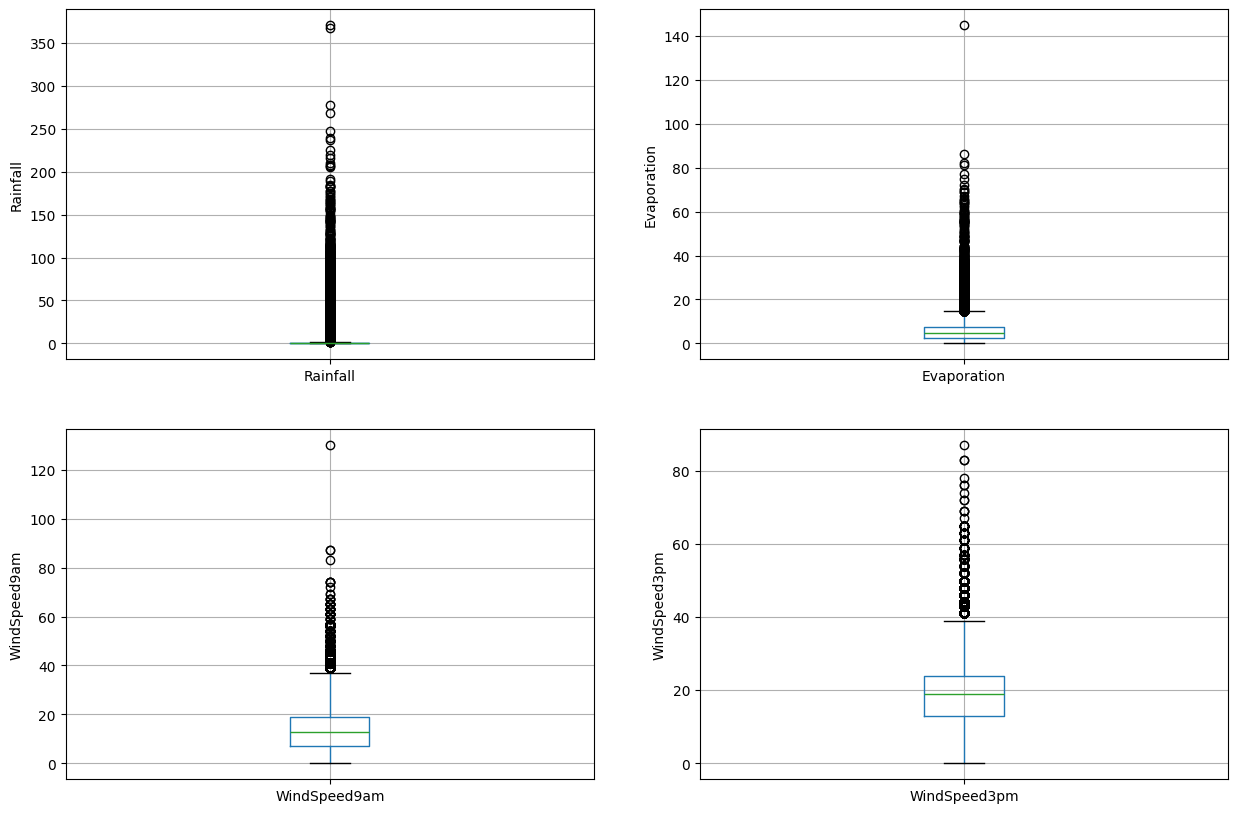

In [38]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df.boxplot(column='Rainfall')
fig.set_title('')
fig.set_ylabel('Rainfall')

plt.subplot(2, 2, 2)
fig = df.boxplot(column='Evaporation')
fig.set_title('')
fig.set_ylabel('Evaporation')

plt.subplot(2, 2, 3)
fig = df.boxplot(column='WindSpeed9am')
fig.set_title('')
fig.set_ylabel('WindSpeed9am')

plt.subplot(2, 2, 4)
fig = df.boxplot(column='WindSpeed3pm')
fig.set_title('')
fig.set_ylabel('WindSpeed3pm')

> có rất nhiều ngoại lai :D

##### Phân bố của 4 cột dữ liệu ngoại lai

Text(0, 0.5, 'RainTomorrow')

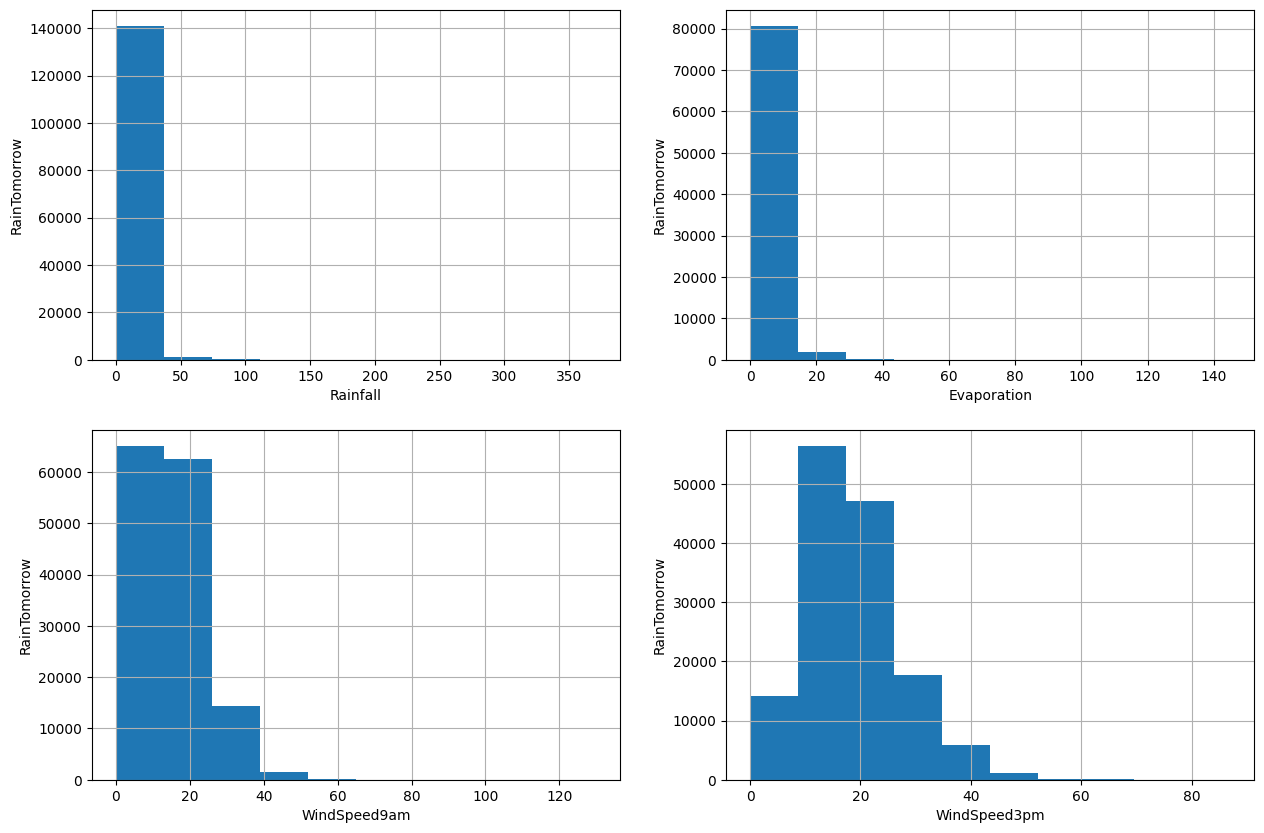

In [39]:
plt.figure(figsize=(15,10))

plt.subplot(2, 2, 1)
fig = df.Rainfall.hist(bins=10)
fig.set_xlabel('Rainfall')
fig.set_ylabel('RainTomorrow')

plt.subplot(2, 2, 2)
fig = df.Evaporation.hist(bins=10)
fig.set_xlabel('Evaporation')
fig.set_ylabel('RainTomorrow')

plt.subplot(2, 2, 3)
fig = df.WindSpeed9am.hist(bins=10)
fig.set_xlabel('WindSpeed9am')
fig.set_ylabel('RainTomorrow')

plt.subplot(2, 2, 4)
fig = df.WindSpeed3pm.hist(bins=10)
fig.set_xlabel('WindSpeed3pm')
fig.set_ylabel('RainTomorrow')

> Cả 4 đều lệch

##### Khoảng tứ phân vị với liệu ngoại lai

###### Cột `Rainfall`

In [40]:
IQR = df.Rainfall.quantile(0.75) - df.Rainfall.quantile(0.25)
Lower_fence = df.Rainfall.quantile(0.25) - (IQR * 3)
Upper_fence = df.Rainfall.quantile(0.75) + (IQR * 3)
print('Rainfall outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Rainfall outliers are values < -2.4000000000000004 or > 3.2


###### Cột `Evaporation`

In [41]:
IQR = df.Evaporation.quantile(0.75) - df.Evaporation.quantile(0.25)
Lower_fence = df.Evaporation.quantile(0.25) - (IQR * 3)
Upper_fence = df.Evaporation.quantile(0.75) + (IQR * 3)
print('Evaporation outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Evaporation outliers are values < -11.800000000000002 or > 21.800000000000004


Cột `WindSpeed9am`

In [42]:
IQR = df.WindSpeed9am.quantile(0.75) - df.WindSpeed9am.quantile(0.25)
Lower_fence = df.WindSpeed9am.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed9am.quantile(0.75) + (IQR * 3)
print('WindSpeed9am outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed9am outliers are values < -29.0 or > 55.0


###### Cột `WindSpeed3pm`

In [43]:
IQR = df.WindSpeed3pm.quantile(0.75) - df.WindSpeed3pm.quantile(0.25)
Lower_fence = df.WindSpeed3pm.quantile(0.25) - (IQR * 3)
Upper_fence = df.WindSpeed3pm.quantile(0.75) + (IQR * 3)
print('WindSpeed3pm outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

WindSpeed3pm outliers are values < -20.0 or > 57.0


In [44]:
df = df.dropna(subset=['RainTomorrow'])

### Chia dữ liệu và huấn luyện

In [45]:
X = df.drop(['RainTomorrow'], axis=1)
y = df['RainTomorrow']

In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [47]:
X_train.shape, X_test.shape

((113754, 24), (28439, 24))

In [48]:
X_train.dtypes

,0
Location,object
MinTemp,float64
MaxTemp,float64
Rainfall,float64
Evaporation,float64
Sunshine,float64
WindGustDir,object
WindGustSpeed,float64
WindDir9am,object
WindDir3pm,object


#### Trích lọc đặc trưng

In [49]:
X_train.dtypes

,0
Location,object
MinTemp,float64
MaxTemp,float64
Rainfall,float64
Evaporation,float64
Sunshine,float64
WindGustDir,object
WindGustSpeed,float64
WindDir9am,object
WindDir3pm,object


In [50]:
categorical = []
for column in X_train.columns:
    if df[column].dtype == 'O':
        categorical.append(column)

categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [51]:
numerical = []
for column in X_train.columns:
    if df[column].dtype != 'O':
        numerical.append(column)

numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'Year',
 'Month',
 'Day']

##### Xử lý dữ liệu thiếu

###### Cột số

In [52]:
X_train[numerical].isnull().sum()

,0
MinTemp,495
MaxTemp,264
Rainfall,1139
Evaporation,48718
Sunshine,54314
WindGustSpeed,7367
WindSpeed9am,1086
WindSpeed3pm,2094
Humidity9am,1449
Humidity3pm,2890


In [53]:
X_test[numerical].isnull().sum()

,0
MinTemp,142
MaxTemp,58
Rainfall,267
Evaporation,12125
Sunshine,13502
WindGustSpeed,1903
WindSpeed9am,262
WindSpeed3pm,536
Humidity9am,325
Humidity3pm,720


In [54]:
# in ra % giá trị thiếu so với tổng dữ liệu
for col in numerical:
   if X_train[col].isnull().sum() / len(X_train) > 0:
      print(col, round(X_train[col].isnull().sum() / len(X_train), 4))

# Cách 2
# for col in numerical:
#     if X_train[col].isnull().mean()>0:
#         print(col, round(X_train[col].isnull().mean(),4))

# # Cách 3 là cách 1 nhưng gán biến
# for col in numerical:
#     missing_rate = X_train[col].isnull().sum() / len(X_train)
#     if missing_rate > 0:
#         print(col, round(missing_rate, 4))

MinTemp 0.0044
MaxTemp 0.0023
Rainfall 0.01
Evaporation 0.4283
Sunshine 0.4775
WindGustSpeed 0.0648
WindSpeed9am 0.0095
WindSpeed3pm 0.0184
Humidity9am 0.0127
Humidity3pm 0.0254
Pressure9am 0.0986
Pressure3pm 0.0983
Cloud9am 0.3792
Cloud3pm 0.4023
Temp9am 0.0065
Temp3pm 0.0191


> Nếu dữ liệu thiếu chiếm < 5% của tổng dữ liệu thì xóa

Có hai phương pháp có thể được sử dụng để điền giá trị thiếu.

- Phương pháp thứ nhất là điền bằng giá trị trung bình hoặc trung vị.

- Phương pháp thứ hai là điền bằng cách lấy mẫu ngẫu nhiên.

Khi trong tập dữ liệu có các giá trị ngoại lai (outliers), thì nên sử dụng phương pháp điền bằng trung vị.

In [55]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')

X_train[numerical] = imputer.fit_transform(X_train[numerical])
X_test[numerical] = imputer.transform(X_test[numerical])

# Cách 2
# for df1 in [X_train, X_test]:
#     for col in numerical:
#         col_median=X_train[col].median()
#         df1[col].fillna(col_median, inplace=True)

In [56]:
X_train[numerical].isnull().sum()

,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustSpeed,0
WindSpeed9am,0
WindSpeed3pm,0
Humidity9am,0
Humidity3pm,0


In [57]:
X_test[numerical].isnull().sum()

,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustSpeed,0
WindSpeed9am,0
WindSpeed3pm,0
Humidity9am,0
Humidity3pm,0


###### Cột phân loại

In [58]:
for col in categorical:
   if X_train[col].isnull().sum() / len(X_train) > 0:
      print(col, round(X_train[col].isnull().sum() / len(X_train), 4))

WindGustDir 0.0651
WindDir9am 0.0701
WindDir3pm 0.0264
RainToday 0.01


In [59]:
from sklearn.impute import SimpleImputer

imputer_cat = SimpleImputer(strategy='most_frequent')

X_train[categorical] = imputer_cat.fit_transform(X_train[categorical])
X_test[categorical] = imputer_cat.transform(X_test[categorical])

In [60]:
X_train[categorical].isnull().sum()

,0
Location,0
WindGustDir,0
WindDir9am,0
WindDir3pm,0
RainToday,0


In [61]:
X_train.isnull().sum()

,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0
WindDir3pm,0


In [62]:
X_test.isnull().sum()

,0
Location,0
MinTemp,0
MaxTemp,0
Rainfall,0
Evaporation,0
Sunshine,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0
WindDir3pm,0


> Không còn dữ liệu thiếu

##### Xử lý dữ liệu ngoại lai (cột số)

Như phần EDA phần khoảng tứ phân vị ta có 4 cột lần lượt là `Rainfall`, `Evaporation`, `WindSpeed9am` và `WindSpeed3pm`

In [63]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)

In [64]:
X_train.Rainfall.max(), X_test.Rainfall.max()

(3.2, 3.2)

In [65]:
X_train.Evaporation.max(), X_test.Evaporation.max()

(21.8, 21.8)

In [66]:
X_train.WindSpeed9am.max(), X_test.WindSpeed9am.max()

(55.0, 55.0)

In [67]:
X_train.WindSpeed3pm.max(), X_test.WindSpeed3pm.max()

(57.0, 57.0)

In [68]:
X_train[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000,113754.000000
mean,12.193497,23.237216,0.675080,5.151606,8.041154,39.884074,13.978155,18.614756,68.867486,51.509547,1017.640649,1015.241101,4.651801,4.703588,16.995062,21.688643,2012.759727,6.404021,15.710419
std,6.388279,7.094149,1.183837,2.823707,2.769480,13.116959,8.806558,8.685862,18.935587,20.530723,6.738680,6.675168,2.292726,2.117847,6.463772,6.855649,2.540419,3.427798,8.796821
min,-8.200000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,2007.000000,1.000000,1.000000
25%,7.600000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.000000,3.000000,4.000000,12.300000,16.700000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.600000,5.400000,8.700000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.300000,2015.000000,9.000000,23.000000
max,33.900000,48.100000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,8.000000,40.200000,46.700000,2017.000000,12.000000,31.000000


> Các ngoại lệ trong các cột `Rainfall`, `Evaporation`, `WindSpeed9am` và `WindSpeed3pm` được giới hạn

##### Encode cột phân loại

###### X

In [69]:
categorical

['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [70]:
X_train[categorical].head()

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday
113462,Witchcliffe,S,SSE,S,No
89638,Cairns,ENE,SSE,SE,Yes
138130,AliceSprings,E,NE,N,No
87898,Cairns,ESE,SSE,E,No
16484,Newcastle,W,N,SE,No


In [71]:
# pip install category_encoders

In [72]:
import category_encoders as ce

# Binary cho RainToday
bin_encoder = ce.BinaryEncoder(cols=['RainToday'])
X_train_bin = bin_encoder.fit_transform(X_train[['RainToday']])
X_test_bin = bin_encoder.transform(X_test[['RainToday']])

# One-hot cho Location
ohe_encoder = ce.OneHotEncoder(cols=['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])
X_train_ohe = ohe_encoder.fit_transform(X_train[['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']])
X_test_ohe = ohe_encoder.transform(X_test[['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']])

In [73]:
# Ghép lại
X_train = pd.concat([X_train[numerical], X_train_bin, X_train_ohe], axis=1)
X_test = pd.concat([X_test[numerical], X_test_bin, X_test_ohe], axis=1)

In [74]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_7,WindDir3pm_8,WindDir3pm_9,WindDir3pm_10,WindDir3pm_11,WindDir3pm_12,WindDir3pm_13,WindDir3pm_14,WindDir3pm_15,WindDir3pm_16
113462,13.9,22.6,0.2,4.8,8.5,41.0,20.0,28.0,65.0,55.0,...,0,0,0,0,0,0,0,0,0,0
89638,22.4,29.4,2.0,6.0,6.3,33.0,7.0,19.0,71.0,59.0,...,0,0,0,0,0,0,0,0,0,0
138130,9.7,36.2,0.0,11.4,12.3,31.0,15.0,11.0,6.0,2.0,...,0,0,0,0,0,0,0,0,0,0
87898,20.5,30.1,0.0,8.8,11.1,37.0,22.0,19.0,59.0,53.0,...,0,0,0,0,0,0,0,0,0,0
16484,16.8,29.2,0.0,4.8,8.5,39.0,0.0,7.0,72.0,53.0,...,0,0,0,0,0,0,0,0,0,0


In [75]:
X_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_7,WindDir3pm_8,WindDir3pm_9,WindDir3pm_10,WindDir3pm_11,WindDir3pm_12,WindDir3pm_13,WindDir3pm_14,WindDir3pm_15,WindDir3pm_16
88578,17.4,29.0,0.0,3.6,11.1,33.0,11.0,19.0,63.0,61.0,...,0,0,0,0,1,0,0,0,0,0
59016,6.8,14.4,0.8,0.8,8.5,46.0,17.0,22.0,80.0,55.0,...,0,0,0,0,0,0,0,0,0,0
127049,10.1,15.4,3.2,4.8,8.5,31.0,13.0,9.0,70.0,61.0,...,0,0,0,0,0,0,1,0,0,0
120886,14.4,33.4,0.0,8.0,11.6,41.0,9.0,17.0,40.0,23.0,...,0,0,0,1,0,0,0,0,0,0
136649,6.8,14.3,3.2,0.2,7.3,28.0,15.0,13.0,92.0,47.0,...,1,0,0,0,0,0,0,0,0,0


###### Y

In [76]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test  = le.transform(y_test)

##### Chuẩn hóa dữ liệu

In [77]:
cols = X_train.columns

In [78]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [79]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

In [80]:
# X_train.describe()

#### Huấn luyện

In [81]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [82]:
y_pred = model.predict(X_test)

In [83]:
# model.predict_proba(X_test)[:,0]

### Đánh giá mô hình

In [84]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.8501


#### So sánh pred_test và pred_train

In [85]:
y_pred_train = model.predict(X_train)
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.8477


##### Kiểm tra có bị overfitting hay underfitting không


In [86]:
print('Test set score: {:.4f}'.format(model.score(X_test, y_test)))
print('Training set score: {:.4f}'.format(model.score(X_train, y_train)))

Test set score: 0.8501
Training set score: 0.8477


> tương đương nhau không bị overfit

### Huấn luyện mô hình với C

C => regularization mạnh => model đơn giản

C lớn => regularization yếu => model linh hoạt hơn

#### C=100

In [87]:
model100 = LogisticRegression(C=100, solver='liblinear', random_state=0)
model100.fit(X_train, y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [88]:
print('Training set score: {:.4f}'.format(model100.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(model100.score(X_test, y_test)))

Training set score: 0.8478
Test set score: 0.8505


#### C=0.01

In [89]:
model001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)
model001.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [90]:
print('Training set score: {:.4f}'.format(model001.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(model001.score(X_test, y_test)))

Training set score: 0.8409
Test set score: 0.8448


> cũng chả chênh nhau là mấy

In [91]:
pd.Series(y_test).value_counts()

,count
0,22067
1,6372


In [92]:
null_accuracy = (22067/(22067+6372))
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7759


> Chả càn học gì nhiều đoán 0 thôi cũng đã đúng tới 0.77

### Chỉ số phân loại

#### Ma trận nhầm lẫn

In [93]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[20892  1175]
 [ 3087  3285]]

True Positives(TP) =  20892

True Negatives(TN) =  3285

False Positives(FP) =  1175

False Negatives(FN) =  3087


<Axes: >

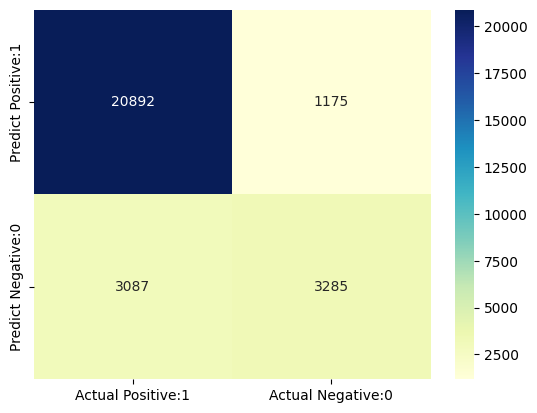

In [94]:
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'],
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [95]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91     22067
           1       0.74      0.52      0.61      6372

    accuracy                           0.85     28439
   macro avg       0.80      0.73      0.76     28439
weighted avg       0.84      0.85      0.84     28439



In [96]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

#### Precision

In [97]:
precision = TP / float(TP + FP)

print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9468


#### Recall

In [98]:
recall = TP / float(TP + FN)

print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8713


#### ROC

In [99]:
y_prob = model.predict_proba(X_test)[:, 1]

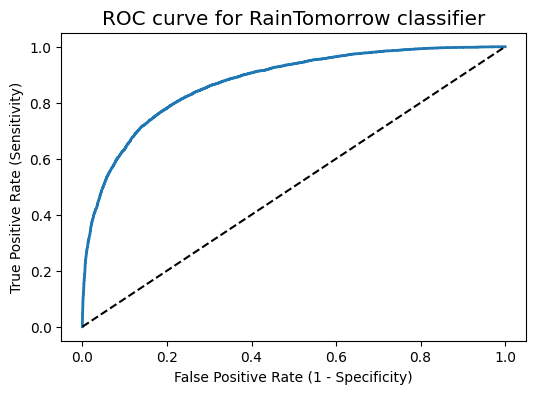

In [100]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_prob)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1], [0,1], 'k--' )
plt.rcParams['font.size'] = 12
plt.title('ROC curve for RainTomorrow classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

plt.show()

#### ROC AUC

In [101]:
from sklearn.metrics import roc_auc_score

ROC_AUC = roc_auc_score(y_test, y_prob)
print('ROC AUC : {:.4f}'.format(ROC_AUC))

ROC AUC : 0.8729


### k-Fold Cross Validation

In [102]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, X_train, y_train, cv = 5, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.84690783 0.84624852 0.84633642 0.84958903 0.84773626]


In [103]:
print('Average cross-validation score: {:.4f}'.format(scores.mean()))

Average cross-validation score: 0.8474


### GridSearch CV

In [104]:
from sklearn.model_selection import GridSearchCV

parameters = [{'penalty':['l1','l2']},
              {'C':[1, 10, 100, 1000]}]

grid_search = GridSearchCV(estimator = model,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 5,
                           verbose=0)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(random_state=0, solver='liblinear'),
             param_grid=[{'penalty': ['l1', 'l2']}, {'C': [1, 10, 100, 1000]}],
             scoring='accuracy')

In [105]:
print('GridSearch CV best score : {:.4f}\n\n'.format(grid_search.best_score_))

print('Parameters that give the best results :','\n\n', (grid_search.best_params_))

print('\n\nEstimator that was chosen by the search :','\n\n', (grid_search.best_estimator_))

GridSearch CV best score : 0.8474


Parameters that give the best results : 

 {'penalty': 'l1'}


Estimator that was chosen by the search : 

 LogisticRegression(penalty='l1', random_state=0, solver='liblinear')


#### Tính điểm áp dụng tổ hợp trên

In [106]:
print('GridSearch CV score on test set: {0:0.4f}'.format(grid_search.score(X_test, y_test)))

GridSearch CV score on test set: 0.8507


---

## Kết luận

Độ chính xác (accuracy) của mô hình hồi quy logistic là 0.8501. Vì vậy, mô hình làm rất tốt trong việc dự đoán ngày mai ở Úc có mưa hay không.

Chỉ có một số ít quan sát dự đoán rằng ngày mai sẽ có mưa vì phần lớn các quan sát dự đoán rằng ngày mai sẽ không có mưa.

Mô hình không có dấu hiệu bị overfitting.

Việc tăng giá trị C dẫn đến độ chính xác trên tập test cao hơn và đồng thời độ chính xác trên tập train cũng tăng nhẹ. Do đó, có thể kết luận rằng một mô hình phức tạp hơn sẽ hoạt động tốt hơn.

Việc tăng ngưỡng (threshold) dẫn đến độ chính xác. (Chưa làm)

Chỉ số ROC AUC của mô hình tiến gần tới 1. Vì vậy, có thể kết luận rằng bộ phân loại đã làm tốt việc dự đoán ngày mai có mưa hay không.

Độ chính xác của mô hình ban đầu là 0.8501, trong khi độ chính xác sau khi áp dụng RFECV là 0.8500. Như vậy, đạt được độ chính xác gần như tương đương nhưng với số lượng đặc trưng ít hơn.

Trong mô hình ban đầu, số False Positive (FP) = 1175, trong khi FP1 = 1174. Như vậy, số lượng dự đoán sai dương tính gần như giống nhau. Đồng thời, False Negative (FN) = 3087 trong khi FN1 = 3091, tức là số lượng dự đoán sai âm tính tăng nhẹ.

Điểm số của mô hình ban đầu là 0.8476, trong khi điểm trung bình cross-validation là 0.8474. Do đó, có thể kết luận rằng cross-validation không cải thiện hiệu năng mô hình.

Độ chính xác trên tập test của mô hình ban đầu là 0.8501, trong khi độ chính xác sau khi dùng GridSearchCV là 0.8507. Ta có thể thấy rằng GridSearchCV đã cải thiện hiệu năng cho mô hình này.

---